In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.RGBANet()

CNN configuration: 
    Our CNN with image, prob, merged_array, border_overlap as RGBA.
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1')

Loaded /home/d/patches/cylinder_small1/ in 0.183724880219 seconds.


In [4]:
X_train_rgba = np.concatenate((X_train['image'], 
                               X_train['prob'], 
                               X_train['merged_array'],
                               X_train['border_overlap']), 1)

In [5]:
X_test_rgba = np.concatenate((X_test['image'], 
                              X_test['prob'], 
                              X_test['merged_array'],
                              X_test['border_overlap']), 1)

In [6]:
cnn = cnn.fit(X_train_rgba, y_train)

# Neural Network with 386658 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     4x75x75
  1  conv1     16x63x63
  2  pool1     16x31x31
  3  conv2     16x19x19
  4  pool2     16x9x9
  5  hidden3   256
  6  dropout3  256
  7  output    2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.54752       0.45367      1.20687      0.78575  13.52s
      2       0.45459       0.40662      1.11797      0.81591  13.47s
      3       0.41497       0.37561      1.10479      0.83964  13.48s
      4       0.38854       0.35913      1.08189      0.84144  13.60s
      5       0.36889       0.35504      1.03900      0.84160  13.60s
      6       0.35116       0.33156      1.05912      0.85843  13.60s
      7       0.33251       0.32901      1.01063      0.86210  13.61s
      8       0.32078       0.31426      1.02074      0.87046  13.60s
      9      

In [7]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score(X_test_rgba, y_test)

0.8144171779141104

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

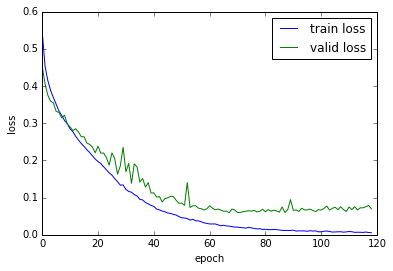

In [8]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)

In [11]:
# this is the score on cylinder_small1 with regularization and patience counter 50
cnn.score(X_test_rgba, y_test)

0.7979294478527608

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

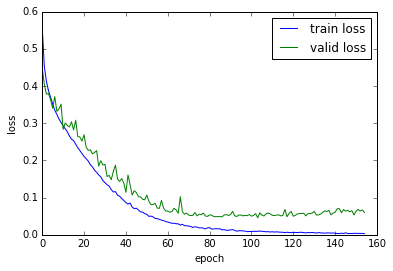

In [12]:
# this is the plot on cylinder_small1 with regularization and patience counter 50
plot_loss(cnn)

In [7]:
# this is the score on cylinder_small1 with regularization
cnn.score(X_test_rgba, y_test)

0.8209355828220859

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

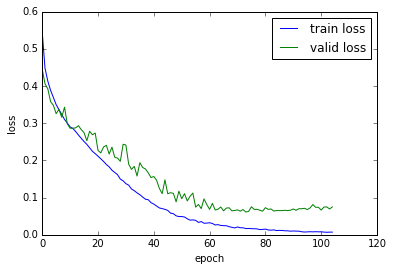

In [8]:
# this is the plot on cylinder_small1 with regularization
plot_loss(cnn)

In [11]:
# this is the score on cylinder_small1 without regularization
cnn.score(X_test_rgba, y_test)

0.8136503067484663

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

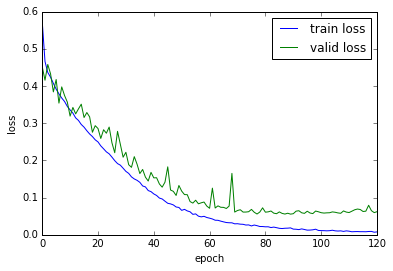

In [13]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)